# Visualizing filters in Pytorch

### Imports

In [0]:
!pip3 install torchsummary

In [0]:
import matplotlib.pyplot as plt
from PIL import Image
import torchvision
import torch
import numpy as np
from torchsummary import summary
%matplotlib inline

Image shape: (224, 224)


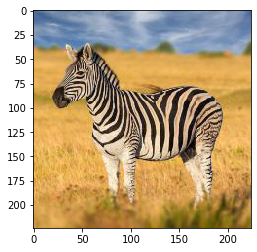

In [0]:
image = Image.open("images/zebra.jpg")
plt.imshow(image)
print("Image shape:", image.size)

### Model definition
In this example we will use a pre-trained ResNet50 network. ResNet-50 is a fully-convolutional neural network that excels at image classification.

In [0]:
model = torchvision.models.resnet50(pretrained=True)
print(summary(model, (3, 224, 224))) # using the torchsummary, because I think it's prettier

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 97.5MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

### First convolution layer
In this task we are interested in visualizing the first convolutional layer. This can be retrieved by the following code block:

We can see that it has 64 filters/kernels in the layer. Each kernel is a $7 \times 7$ filter, that takes an RGB image as input

In [0]:
first_conv_layer = model.conv1
print("First conv layer weight shape:", first_conv_layer.weight.shape)
print("First conv layer:", first_conv_layer)

First conv layer weight shape: torch.Size([64, 3, 7, 7])
First conv layer: Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)


### Activation from first layer
We can retrieve the activation from the first layer by doing a forward pass throught this conv layer.

However, first we need to resize, and normalize the image with the mean and standard deviation that they used to originally train this network.

In [0]:
image_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

In [0]:
image = image_transform(image)[None]
print("Image shape:", image.shape)

Image shape: torch.Size([1, 3, 224, 224])


In [0]:
activation = first_conv_layer(image)
print("Activation shape:", activation.shape)

Activation shape: torch.Size([1, 64, 112, 112])


### Visualize filters & Activation

In [0]:
# tip
# To transform a weight to a numpy array, you can use to function
def torch_image_to_numpy(image: torch.Tensor):
    # Normalize to [0 - 1.0]
    image = image.detach().cpu() # Transform image to CPU memory (if on GPU VRAM)
    image = image - image.min()
    image = image / image.max()
    image = image.numpy()
    if len(image.shape) == 2: # Grayscale image, can just return
        return image
    assert image.shape[0] == 3, "Expected color channel to be on first axis. Got: {}".format(image.shape)
    image = np.moveaxis(image, 0, 2)
    return image    

### Indices to be used

In [0]:
indices = [5, 8, 19, 22, 34]

### Filters visualized

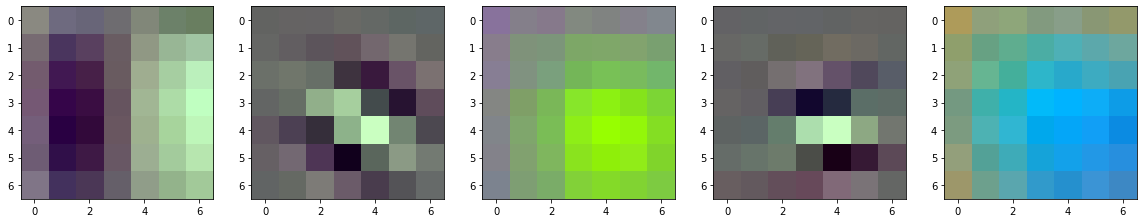

In [0]:
plt.figure(figsize=(20, 4)) 
for x, i  in enumerate(indices):
  kernel_im = torch_image_to_numpy(first_conv_layer.weight[i])
  plt.subplot(1,5, x+1)
  plt.imshow(kernel_im)
  plt.savefig("/content/image_processed/task2d_image_kernel_{}.png".format(i), format="png")

### Activations visualized

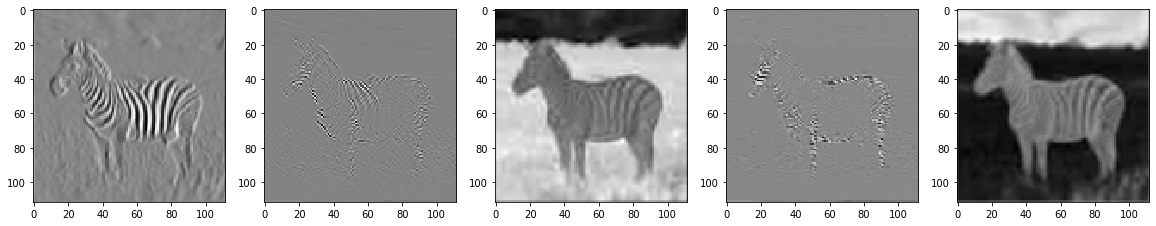

In [0]:
plt.figure(figsize=(20, 4)) 
for x, i in enumerate(indices):
  act_im = torch_image_to_numpy(activation[0, i])
  plt.subplot(1,5,x+1)
  plt.imshow(act_im, cmap="gray")
  plt.savefig("/content/image_processed/task2d_image_activation_{}.png".format(i), format="png")
